In [1]:
from modeling import *
import matplotlib.pyplot as plt
import os
import glob
% matplotlib inline

In [29]:
filname_46005 = 'data_X_y_46005_train.csv'
filname_46059 = 'data_X_y_46059_train.csv'

train_yrs = [1995, 2000, 2004, 2006]
test_yrs = [2007]

df_train_46005, df_test_46005 = parse_date_to_train_test(filename_46005, train_yrs, test_yrs)
df_train_46059, df_test_46059 = parse_date_to_train_test(filename_46059, train_yrs, test_yrs)

In [18]:
test = pd.read_csv('../data/NDBC_all_data_all_years.csv', parse_dates=['Date'], index_col='Date')

/Users/abdulla/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [466]:
debug = test[test['ID'] == 46026]

In [496]:
testing = make_hourly_data(debug, 2003)
testing1 = join_all_hourly_data(debug,[1994,1995,1996,1997,1998,1999,2000,2001,2002, 2003])

In [497]:
testing1.tail()

,id,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,ID
id,,,,,,,,,,,,,,,,,,
2003-12-31 19:00:00,2003-12-31 19:00:00,2003.0,12.0,31.0,19.0,178.0,3.1,4.0,1.73,21.05,8.23,NaN,1015.8,11.6,12.8,NaN,NaN,46026.0
2003-12-31 20:00:00,2003-12-31 20:00:00,2003.0,12.0,31.0,20.0,268.0,3.5,4.3,1.85,19.05,8.66,NaN,1015.0,11.9,12.8,NaN,NaN,46026.0
2003-12-31 21:00:00,2003-12-31 21:00:00,2003.0,12.0,31.0,21.0,269.0,3.4,4.6,1.70,10.81,7.92,NaN,1014.5,11.8,12.8,NaN,NaN,46026.0
2003-12-31 22:00:00,2003-12-31 22:00:00,2003.0,12.0,31.0,22.0,267.0,3.8,5.2,1.72,19.05,7.99,NaN,1014.6,11.7,12.8,NaN,NaN,46026.0
2003-12-31 23:00:00,2003-12-31 23:00:00,2003.0,12.0,31.0,23.0,247.0,3.8,4.7,2.03,19.05,9.26,NaN,1014.2,11.7,12.8,NaN,NaN,46026.0


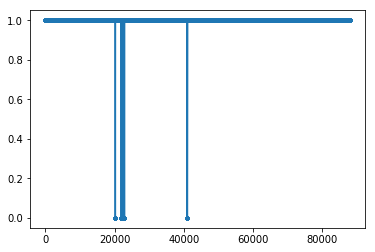

In [498]:
bb = testing1.index[1:] - testing1.index[:-1]
plt.plot(bb.total_seconds()/3600,marker='.')

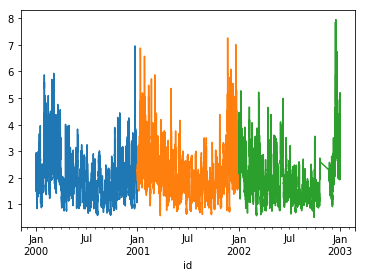

In [501]:
testing1['2000']['WVHT'].plot()
testing1['2001']['WVHT'].plot()
testing1['2002']['WVHT'].plot()

In [400]:
import pandas as pd 
import numpy as np
import datetime

yr_lst = [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 
          2003, 2004, 2006, 2007, 2008, 2012]

def make_hourly_data(dataframe, year):
    '''
    take in a data frame and the years as a list which needs to be filled

    '''
    d = pd.date_range(start='1/1/{} 00:00:00'.format(year), 
                      end='12/31/{} 23:00:00'.format(year), 
                      freq='1H')
    
    df_test = pd.DataFrame(np.nan, index = d, columns = ['dummy'])
    df_test['id'] = df_test.index
    
    dataframe['id'] = dataframe.index
    df_joined = pd.merge(df_test, dataframe, how='left', left_on='id', right_on='id')
    df_joined.index = df_joined['id']
    df_joined.drop(columns='dummy', inplace=True)
    df_joined = df_joined.interpolate(method='linear', axis=0).bfill()
    
    return df_joined

def join_all_houlry_data(dataframe, year_list):
    '''
    input: 
    takes in a dataframe 
    years as list

    output:
    joined data frame with all yeasrs, with houlry intervals filled in
    '''

    df_lst = []

    for year in year_list:
        df_lst.append(make_hourly_data(dataframe, year))

    return pd.concat(df_lst, axis=0)
    


In [401]:
yr_lst = [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
              2003, 2004, 2006, 2007, 2008, 2012]
join_all_houlry_data(test, yr_lst)

,id,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,ID
id,,,,,,,,,,,,,,,,,,
1994-01-01 00:00:00,1994-01-01 00:00:00,1994.0,1.0,1.0,0.0,231.0,8.9,11.10,4.80,11.10,8.20,288.000000,1000.7,12.1,11.400000,NaN,28.800000,46005
1994-01-01 00:00:00,1994-01-01 00:00:00,1994.0,1.0,1.0,0.0,216.0,7.9,10.70,5.10,12.50,8.30,288.000000,1003.4,13.6,13.700000,NaN,28.800000,46006
1994-01-01 00:00:00,1994-01-01 00:00:00,1994.0,1.0,1.0,0.0,3.0,2.2,3.00,2.00,14.30,9.10,288.000000,1021.0,12.6,13.300000,NaN,28.800000,46012
1994-01-01 00:00:00,1994-01-01 00:00:00,1994.0,1.0,1.0,0.0,152.0,3.7,5.00,2.20,12.50,8.80,288.000000,1020.5,11.3,12.400000,NaN,28.800000,46013
1994-01-01 00:00:00,1994-01-01 00:00:00,1994.0,1.0,1.0,0.0,55.0,5.3,6.70,1.90,14.30,9.80,288.000000,1021.1,11.4,11.800000,NaN,28.800000,46026
1994-01-01 00:00:00,1994-01-01 00:00:00,1994.0,1.0,1.0,0.0,353.0,5.2,6.70,3.50,10.00,8.00,288.000000,1004.6,0.9,3.200000,NaN,28.800000,46035
1994-01-01 00:00:00,1994-01-01 00:00:00,1994.0,1.0,1.0,0.0,299.0,3.2,4.10,2.30,12.50,9.90,288.000000,1021.2,12.5,6.066667,NaN,28.800000,46042
1994-01-01 00:00:00,1994-01-01 00:00:00,1994.0,1.0,1.0,0.0,173.0,9.3,10.10,3.40,11.25,8.85,287.800000,1019.9,11.4,8.933333,NaN,28.780000,ptac1
1994-01-01 01:00:00,1994-01-01 01:00:00,1994.0,1.0,1.0,1.0,220.0,4.1,5.50,4.50,10.00,7.80,287.600000,1006.1,12.3,11.800000,NaN,28.760000,46002


In [398]:
bb = make_hourly_data(df_B,1995)
bb.head()

/Users/abdulla/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,ID
id,,,,,,,,,,,,,,,,,,
1995-01-01 00:00:00,1995-01-01 00:00:00,1995.0,1.0,1.0,0.0,216.0,5.3,6.7,4.1,12.5,8.20,NaN,1005.1,12.60,14.5,NaN,NaN,46059
1995-01-01 01:00:00,1995-01-01 01:00:00,1995.0,1.0,1.0,1.0,217.0,8.2,10.3,4.4,14.3,8.50,NaN,1005.5,13.10,14.5,NaN,NaN,46059
1995-01-01 02:00:00,1995-01-01 02:00:00,1995.0,1.0,1.0,2.0,212.5,7.5,9.4,4.1,14.3,8.15,NaN,1006.0,13.35,14.5,NaN,NaN,46059
1995-01-01 03:00:00,1995-01-01 03:00:00,1995.0,1.0,1.0,3.0,208.0,6.8,8.5,3.8,14.3,7.80,NaN,1006.5,13.60,14.5,NaN,NaN,46059
1995-01-01 04:00:00,1995-01-01 04:00:00,1995.0,1.0,1.0,4.0,213.0,7.8,9.3,3.7,14.3,8.20,NaN,1007.0,14.10,14.5,NaN,NaN,46059


In [410]:
from format_train_test import *

filename = '../data/NDBC_all_data_all_years.csv'
buoyID_train = [46059]
buoyID_test = [46026]

# getting the testing and traing data
data_train_46059 = get_train_bouys(filename, buoyID_train[0])
data_labels_46026  = get_train_bouys(filename, buoyID_test[0])

yr_lst = [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
          2003, 2004, 2006, 2007, 2008, 2012]

In [424]:
from format_train_test import *
data_train_46059_hr = join_all_hourly_data(data_train_46059, yr_lst)
data_labels_46026_hr  = join_all_hourly_data(data_labels_46026, yr_lst)

In [425]:
# adding the arrival time column to the data frame
data_train_46059_t = adding_speed_col(data_train_46059_hr , 650)

In [426]:
data_train_46059_t.head()

,id,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,ID,t_arrive
id,,,,,,,,,,,,,,,,,,,
1994-01-01 00:00:00,1994-01-01 00:00:00,1994.0,10.0,19.0,0.0,12.0,3.3,4.5,3.1,14.3,9.8,50.0,1017.5,16.7,18.8,14.0,NaN,46059.0,8.086967
1994-01-01 01:00:00,1994-01-01 01:00:00,1994.0,10.0,19.0,0.0,12.0,3.3,4.5,3.1,14.3,9.8,50.0,1017.5,16.7,18.8,14.0,NaN,46059.0,8.086967
1994-01-01 02:00:00,1994-01-01 02:00:00,1994.0,10.0,19.0,0.0,12.0,3.3,4.5,3.1,14.3,9.8,50.0,1017.5,16.7,18.8,14.0,NaN,46059.0,8.086967
1994-01-01 03:00:00,1994-01-01 03:00:00,1994.0,10.0,19.0,0.0,12.0,3.3,4.5,3.1,14.3,9.8,50.0,1017.5,16.7,18.8,14.0,NaN,46059.0,8.086967
1994-01-01 04:00:00,1994-01-01 04:00:00,1994.0,10.0,19.0,0.0,12.0,3.3,4.5,3.1,14.3,9.8,50.0,1017.5,16.7,18.8,14.0,NaN,46059.0,8.086967


In [427]:
# adding time delta for the data frames
data_train_46059_t = add_time_delta(data_train_46059_t)
data_train_46059_t.head()

,id,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,ID,t_arrive,time_delta
id,,,,,,,,,,,,,,,,,,,,
1994-01-01 00:00:00,1994-01-01 00:00:00,1994.0,10.0,19.0,0.0,12.0,3.3,4.5,3.1,14.3,9.8,50.0,1017.5,16.7,18.8,14.0,NaN,46059.0,8.086967,08:05:13.081768
1994-01-01 01:00:00,1994-01-01 01:00:00,1994.0,10.0,19.0,0.0,12.0,3.3,4.5,3.1,14.3,9.8,50.0,1017.5,16.7,18.8,14.0,NaN,46059.0,8.086967,08:05:13.081768
1994-01-01 02:00:00,1994-01-01 02:00:00,1994.0,10.0,19.0,0.0,12.0,3.3,4.5,3.1,14.3,9.8,50.0,1017.5,16.7,18.8,14.0,NaN,46059.0,8.086967,08:05:13.081768
1994-01-01 03:00:00,1994-01-01 03:00:00,1994.0,10.0,19.0,0.0,12.0,3.3,4.5,3.1,14.3,9.8,50.0,1017.5,16.7,18.8,14.0,NaN,46059.0,8.086967,08:05:13.081768
1994-01-01 04:00:00,1994-01-01 04:00:00,1994.0,10.0,19.0,0.0,12.0,3.3,4.5,3.1,14.3,9.8,50.0,1017.5,16.7,18.8,14.0,NaN,46059.0,8.086967,08:05:13.081768


In [429]:
# adding time to time_delta
data_train_46059_t = add_time_y(data_train_46059_t)
data_train_46059_t.head()

,id,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,...,MWD,BAR,ATMP,WTMP,DEWP,VIS,ID,t_arrive,time_delta,time_y
id,,,,,,,,,,,,,,,,,,,,,
1994-01-01 00:00:00,1994-01-01 00:00:00,1994.0,10.0,19.0,0.0,12.0,3.3,4.5,3.1,14.3,...,50.0,1017.5,16.7,18.8,14.0,NaN,46059.0,8.086967,08:05:13.081768,1994-01-01 08:05:13.081768
1994-01-01 01:00:00,1994-01-01 01:00:00,1994.0,10.0,19.0,0.0,12.0,3.3,4.5,3.1,14.3,...,50.0,1017.5,16.7,18.8,14.0,NaN,46059.0,8.086967,08:05:13.081768,1994-01-01 09:05:13.081768
1994-01-01 02:00:00,1994-01-01 02:00:00,1994.0,10.0,19.0,0.0,12.0,3.3,4.5,3.1,14.3,...,50.0,1017.5,16.7,18.8,14.0,NaN,46059.0,8.086967,08:05:13.081768,1994-01-01 10:05:13.081768
1994-01-01 03:00:00,1994-01-01 03:00:00,1994.0,10.0,19.0,0.0,12.0,3.3,4.5,3.1,14.3,...,50.0,1017.5,16.7,18.8,14.0,NaN,46059.0,8.086967,08:05:13.081768,1994-01-01 11:05:13.081768
1994-01-01 04:00:00,1994-01-01 04:00:00,1994.0,10.0,19.0,0.0,12.0,3.3,4.5,3.1,14.3,...,50.0,1017.5,16.7,18.8,14.0,NaN,46059.0,8.086967,08:05:13.081768,1994-01-01 12:05:13.081768


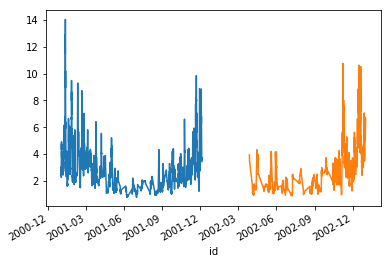

In [454]:
#rounding time
#data_train_46059_t = round_time_y(data_train_46059_t)
#data_train_46059_t['1996']['WVHT'].plot()
#data_train_46059_t['1997']['WVHT'].plot()
#data_train_46059_t['1998']['WVHT'].plot()
#data_train_46059_t['1999']['WVHT'].plot()
#data_train_46059_t['2000']['WVHT'].plot()
data_train_46059_t['2001']['WVHT'].plot()
data_train_46059_t['2002']['WVHT'].plot()
#data_train_46059_t['2003']['WVHT'].plot()
#data_train_46059_t['2004']['WVHT'].plot()
#data_train_46059_t['2006']['WVHT'].plot()
#data_train_46059_t['2007']['WVHT'].plot()
#data_train_46059_t['2008']['WVHT'].plot()
#data_train_46059_t['2012']['WVHT'].plot()

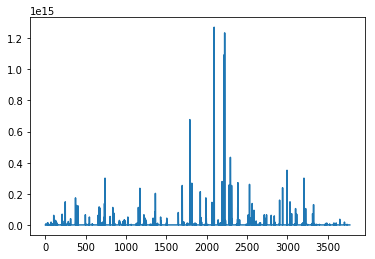

In [464]:
aa = data_train_46059_t['1995'].index
bb = aa[1:] - aa[:-1]
plt.plot(bb)

In [448]:
data_train_46059_t['2003'].head()

,id,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,...,BAR,ATMP,WTMP,DEWP,VIS,ID,t_arrive,time_delta,time_y,time_y_hr
id,,,,,,,,,,,,,,,,,,,,,
2003-01-01 00:00:00,2003-01-01 00:00:00,2003.0,1.0,1.0,0.0,208.0,7.2,8.9,6.43,14.29,...,1021.6,13.6,13.7,14.0,NaN,46059.0,8.092626,08:05:33.454813,2003-01-01 08:05:33.454813,2003-01-01 08:00:00
2003-01-01 01:00:00,2003-01-01 01:00:00,2003.0,1.0,1.0,1.0,201.0,7.3,8.7,5.68,12.50,...,1021.3,13.6,13.7,14.0,NaN,46059.0,9.251490,09:15:05.365543,2003-01-01 10:15:05.365543,2003-01-01 10:00:00
2003-01-01 02:00:00,2003-01-01 02:00:00,2003.0,1.0,1.0,2.0,211.0,7.8,10.5,5.31,12.50,...,1021.2,13.7,14.1,14.0,NaN,46059.0,9.251490,09:15:05.365543,2003-01-01 11:15:05.365543,2003-01-01 11:00:00
2003-01-01 03:00:00,2003-01-01 03:00:00,2003.0,1.0,1.0,3.0,186.0,7.7,9.3,4.74,14.29,...,1020.8,13.7,14.1,14.0,NaN,46059.0,8.092626,08:05:33.454813,2003-01-01 11:05:33.454813,2003-01-01 11:00:00
2003-01-01 04:00:00,2003-01-01 04:00:00,2003.0,1.0,1.0,4.0,190.0,9.1,10.9,5.39,16.67,...,1020.6,13.8,14.1,14.0,NaN,46059.0,6.937230,06:56:14.029351,2003-01-01 10:56:14.029351,2003-01-01 10:00:00


In [438]:
data_labels_46026_hr.head(10)


131737

In [440]:
data_labels_46026_hr.tail()

,id,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,ID
id,,,,,,,,,,,,,,,,,,
2012-12-31 19:00:00,2012-12-31 19:00:00,2012.0,12.0,31.0,19.0,104.0,4.4,6.0,1.78,19.05,8.96,298.894910,1025.6,9.7,11.7,10.1,NaN,46026.0
2012-12-31 20:00:00,2012-12-31 20:00:00,2012.0,12.0,31.0,20.0,97.0,3.3,4.4,1.73,19.05,8.29,298.921182,1025.1,9.9,11.8,10.1,NaN,46026.0
2012-12-31 21:00:00,2012-12-31 21:00:00,2012.0,12.0,31.0,21.0,98.0,2.5,3.5,1.94,19.05,9.77,298.947455,1024.7,10.2,11.9,10.1,NaN,46026.0
2012-12-31 22:00:00,2012-12-31 22:00:00,2012.0,12.0,31.0,22.0,205.0,0.8,1.5,1.91,19.05,9.64,298.973727,1024.9,11.3,11.9,10.1,NaN,46026.0
2012-12-31 23:00:00,2012-12-31 23:00:00,2012.0,12.0,31.0,23.0,242.0,0.6,1.3,1.85,19.05,8.97,299.000000,1024.9,10.3,12.0,10.1,NaN,46026.0


In [432]:
data_train_46059.head()

,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,ID,id
Date,,,,,,,,,,,,,,,,,,
1994-10-19 00:00:00,1994,10,19,0,12.0,3.3,4.5,3.1,14.3,9.8,50.0,1017.5,16.7,18.8,14.0,NaN,46059,1994-10-19 00:00:00
1994-10-19 01:00:00,1994,10,19,1,337.0,1.6,2.9,2.7,12.5,9.3,50.0,1017.4,16.7,18.8,14.0,NaN,46059,1994-10-19 01:00:00
1994-10-19 02:00:00,1994,10,19,2,340.0,3.5,4.9,3.0,14.3,10.0,50.0,1017.3,16.8,18.8,14.0,NaN,46059,1994-10-19 02:00:00
1994-10-19 03:00:00,1994,10,19,3,343.0,4.3,6.2,3.0,14.3,10.2,50.0,1017.3,16.8,18.8,14.0,NaN,46059,1994-10-19 03:00:00
1994-10-19 04:00:00,1994,10,19,4,331.0,4.1,6.8,2.9,12.5,9.4,50.0,1018.0,16.4,18.8,14.0,NaN,46059,1994-10-19 04:00:00


In [433]:
df_B = test[test['ID'] == 46059]
aa = make_hourly_data(df_B,1995)
aa.head()

,id,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,ID
id,,,,,,,,,,,,,,,,,,
1995-01-01 00:00:00,1995-01-01 00:00:00,1995.0,1.0,1.0,0.0,216.0,5.3,6.7,4.1,12.5,8.20,NaN,1005.1,12.60,14.5,NaN,NaN,46059
1995-01-01 01:00:00,1995-01-01 01:00:00,1995.0,1.0,1.0,1.0,217.0,8.2,10.3,4.4,14.3,8.50,NaN,1005.5,13.10,14.5,NaN,NaN,46059
1995-01-01 02:00:00,1995-01-01 02:00:00,1995.0,1.0,1.0,2.0,212.5,7.5,9.4,4.1,14.3,8.15,NaN,1006.0,13.35,14.5,NaN,NaN,46059
1995-01-01 03:00:00,1995-01-01 03:00:00,1995.0,1.0,1.0,3.0,208.0,6.8,8.5,3.8,14.3,7.80,NaN,1006.5,13.60,14.5,NaN,NaN,46059
1995-01-01 04:00:00,1995-01-01 04:00:00,1995.0,1.0,1.0,4.0,213.0,7.8,9.3,3.7,14.3,8.20,NaN,1007.0,14.10,14.5,NaN,NaN,46059


In [434]:
df_B['1995'].head()

,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,ID,id
Date,,,,,,,,,,,,,,,,,,
1995-01-01 00:00:00,1995,1,1,0,216.0,5.3,6.7,4.1,12.5,8.2,NaN,1005.1,12.6,14.5,NaN,NaN,46059,1995-01-01 00:00:00
1995-01-01 01:00:00,1995,1,1,1,217.0,8.2,10.3,4.4,14.3,8.5,NaN,1005.5,13.1,14.5,NaN,NaN,46059,1995-01-01 01:00:00
1995-01-01 03:00:00,1995,1,1,3,208.0,6.8,8.5,3.8,14.3,7.8,NaN,1006.5,13.6,14.5,NaN,NaN,46059,1995-01-01 03:00:00
1995-01-01 04:00:00,1995,1,1,4,213.0,7.8,9.3,3.7,14.3,8.2,NaN,1007.0,14.1,14.5,NaN,NaN,46059,1995-01-01 04:00:00
1995-01-01 05:00:00,1995,1,1,5,211.0,7.6,10.0,3.7,12.5,8.0,NaN,1007.1,14.0,14.5,NaN,NaN,46059,1995-01-01 05:00:00


In [ ]:
d = pd.date_range(start='1/1/2005 00:00:00', end='12/31/2005 23:00:00', freq='1H')
df_test = pd.DataFrame(np.nan, index=d, columns=['dummy'])
df_test['idx'] = df_test.index
h_2005 = df_B.loc['2005',['WVHT','WD','WSPD']]
h_2005['idx'] = h_2005.index
h_2005.head()

In [381]:
lst=range(1995,2012)
print(list(lst))

[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]


In [502]:
#df_A = test[test['ID'] == 46005]
df_B = test[test['ID'] == 46059]

,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,ID
Date,,,,,,,,,,,,,,,,,
1999-11-11 00:00:00,1999,11,11,0,169.0,9.3,12.3,4.97,16.67,10.20,NaN,1006.9,16.4,16.0,NaN,NaN,46059
1999-11-11 01:00:00,1999,11,11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46059
1999-11-11 02:00:00,1999,11,11,2,172.0,11.3,13.8,4.72,16.67,9.47,NaN,1005.3,16.0,16.0,NaN,NaN,46059
1999-11-11 03:00:00,1999,11,11,3,162.0,10.7,13.4,4.38,16.67,8.85,NaN,1004.6,16.7,16.0,NaN,NaN,46059
1999-11-11 04:00:00,1999,11,11,4,162.0,14.0,17.7,5.02,16.67,8.82,NaN,1003.7,16.4,15.9,NaN,NaN,46059
1999-11-11 05:00:00,1999,11,11,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46059
1999-11-11 06:00:00,1999,11,11,6,177.0,13.1,16.0,4.06,16.67,7.85,NaN,1003.4,16.9,15.9,NaN,NaN,46059
1999-11-11 07:00:00,1999,11,11,7,180.0,12.8,15.9,4.25,16.67,7.69,NaN,1003.3,17.3,15.9,NaN,NaN,46059
1999-11-11 08:00:00,1999,11,11,8,180.0,12.1,15.0,4.27,16.67,7.79,NaN,1003.0,17.3,15.9,NaN,NaN,46059


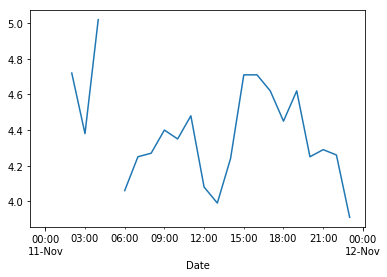

In [347]:
tst1 = df_B['1999-11-11']
tst2 = tst1[::2]
tst1['WVHT'].plot()
tst1

In [350]:
tst3 = tst2.resample('H')

In [353]:
tst3.head(10)

/Users/abdulla/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called head(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS
Date,,,,,,,,,,,,,,,,
1999-11-11 00:00:00,1999.0,11.0,11.0,0.0,169.0,9.3,12.3,4.97,16.67,10.20,NaN,1006.9,16.4,16.0,NaN,NaN
1999-11-11 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-11 02:00:00,1999.0,11.0,11.0,2.0,172.0,11.3,13.8,4.72,16.67,9.47,NaN,1005.3,16.0,16.0,NaN,NaN
1999-11-11 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-11 04:00:00,1999.0,11.0,11.0,4.0,162.0,14.0,17.7,5.02,16.67,8.82,NaN,1003.7,16.4,15.9,NaN,NaN
1999-11-11 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-11 06:00:00,1999.0,11.0,11.0,6.0,177.0,13.1,16.0,4.06,16.67,7.85,NaN,1003.4,16.9,15.9,NaN,NaN
1999-11-11 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-11 08:00:00,1999.0,11.0,11.0,8.0,180.0,12.1,15.0,4.27,16.67,7.79,NaN,1003.0,17.3,15.9,NaN,NaN


In [ ]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

TypeError: Empty 'DataFrame': no numeric data to plot

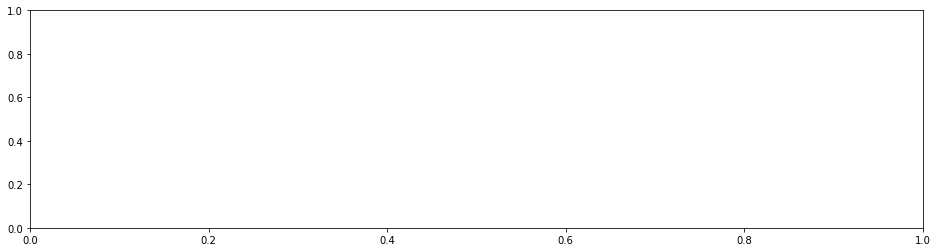

In [504]:
fig, ax = plt.subplots(figsize=(16,4))
#df_A['WVHT'].plot(ax=axes[0], label='46005')
df_B['2013']['WVHT'].plot()
#df_B.loc['2005',['WSPD']].head()

In [247]:
d = pd.date_range(start='1/1/2005 00:00:00', end='12/31/2005 23:00:00', freq='1H')
df_test = pd.DataFrame(np.nan, index=d, columns=['dummy'])
df_test.head()
df_test['idx'] = df_test.index
df_test.head()

,dummy,idx
2005-01-01 00:00:00,NaN,2005-01-01 00:00:00
2005-01-01 01:00:00,NaN,2005-01-01 01:00:00
2005-01-01 02:00:00,NaN,2005-01-01 02:00:00
2005-01-01 03:00:00,NaN,2005-01-01 03:00:00
2005-01-01 04:00:00,NaN,2005-01-01 04:00:00


In [285]:
d = pd.date_range(start='1/1/2005 00:00:00', end='12/31/2005 23:00:00', freq='1H')
df_test = pd.DataFrame(np.nan, index=d, columns=['dummy'])
df_test['idx'] = df_test.index
h_2005 = df_B.loc['2005',['WVHT','WD','WSPD']]
h_2005['idx'] = h_2005.index
h_2005.head()

,WVHT,WD,WSPD,idx
Date,,,,
2005-01-01 00:00:00,4.99,318.0,10.5,2005-01-01 00:00:00
2005-01-01 01:00:00,4.91,318.0,10.7,2005-01-01 01:00:00
2005-01-01 02:00:00,4.49,317.0,11.2,2005-01-01 02:00:00
2005-01-01 03:00:00,4.69,318.0,10.8,2005-01-01 03:00:00
2005-01-01 04:00:00,4.59,308.0,10.5,2005-01-01 04:00:00


In [286]:
df_test.head()

,dummy,idx
2005-01-01 00:00:00,NaN,2005-01-01 00:00:00
2005-01-01 01:00:00,NaN,2005-01-01 01:00:00
2005-01-01 02:00:00,NaN,2005-01-01 02:00:00
2005-01-01 03:00:00,NaN,2005-01-01 03:00:00
2005-01-01 04:00:00,NaN,2005-01-01 04:00:00


,dummy,idx,WVHT,WD,WSPD
idx,,,,,
2005-01-01 00:00:00,NaN,2005-01-01 00:00:00,4.99,318.0,10.5
2005-01-01 01:00:00,NaN,2005-01-01 01:00:00,4.91,318.0,10.7
2005-01-01 02:00:00,NaN,2005-01-01 02:00:00,4.49,317.0,11.2
2005-01-01 03:00:00,NaN,2005-01-01 03:00:00,4.69,318.0,10.8
2005-01-01 04:00:00,NaN,2005-01-01 04:00:00,4.59,308.0,10.5


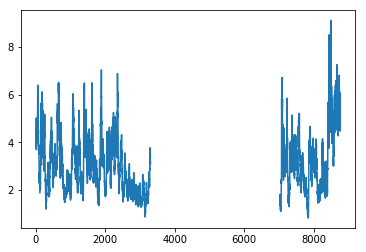

In [287]:
df_joined = pd.merge(df_test, h_2005, how='left', left_on='idx', right_on='idx')
df_joined['WVHT'].plot()
df_joined.index = df_joined['idx']
df_joined.head()

In [288]:
idtest = df_joined.index[1:] - df_joined.index[:-1] 
test_diff_hrs = idtest.total_seconds()/3600

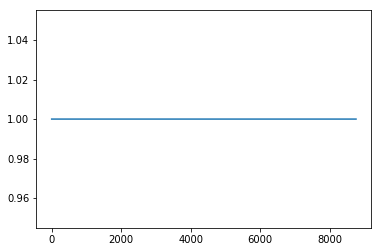

In [289]:
plt.plot(test_diff_hrs)

In [278]:
df_joined['WSDP'].isna().sum()

8760

In [279]:
len(df_joined)

8760

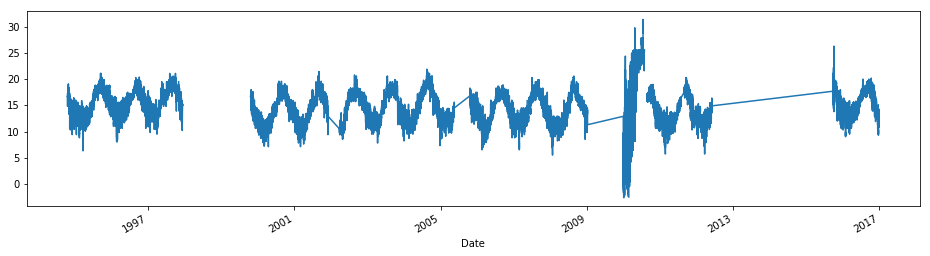

In [36]:
fig, ax = plt.subplots(figsize=(16,4))
df_B['ATMP'].plot()

In [46]:
df_B_2000 = df_B['2000']

In [47]:
df_B_2000.head()

,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,ID
Date,,,,,,,,,,,,,,,,,
2000-01-01 00:00:00,2000,1,1,0,312.0,8.5,10.3,2.05,16.67,6.16,NaN,1023.6,12.1,13.4,NaN,NaN,46059
2000-01-01 01:00:00,2000,1,1,1,323.0,7.3,9.2,1.92,6.25,5.45,NaN,1023.7,11.9,13.3,NaN,NaN,46059
2000-01-01 02:00:00,2000,1,1,2,325.0,9.5,10.8,2.01,16.67,5.88,NaN,1024.1,12.1,13.4,NaN,NaN,46059
2000-01-01 03:00:00,2000,1,1,3,317.0,8.2,9.8,2.09,14.29,5.78,NaN,1024.2,12.1,13.3,NaN,NaN,46059
2000-01-01 04:00:00,2000,1,1,4,326.0,8.4,10.7,2.13,14.29,5.87,NaN,1024.3,11.5,13.4,NaN,NaN,46059


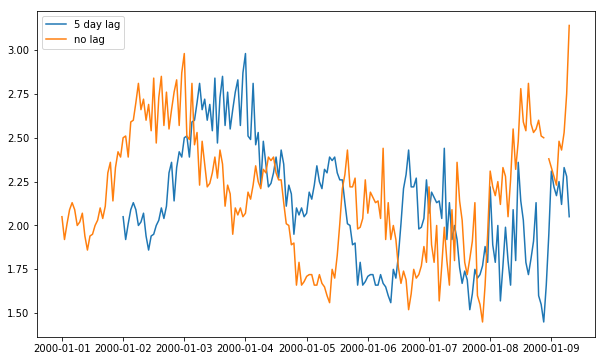

In [68]:
lag_1_day = df_B_2000['WVHT'].shift(72)
no_lag = df_B_2000['WVHT']
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(lag_5_day[:200], label='5 day lag')
ax.plot(no_lag[:200], label='no lag')
plt.legend()

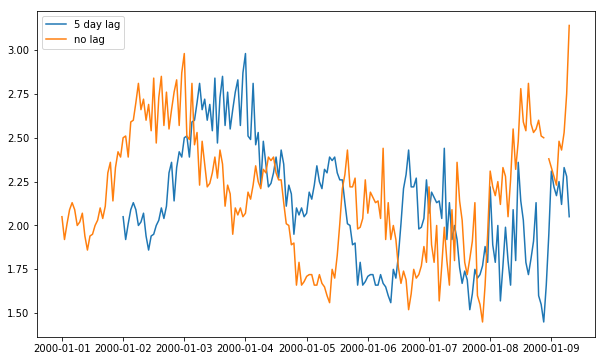

In [73]:
lag_1_day = df_B_2000['WVHT'].rolling(window=10).mean()
no_lag = df_B_2000['WVHT']
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(lag_5_day[:200], label='5 day lag')
ax.plot(no_lag[:200], label='no lag')
plt.legend()

In [130]:
aa =  df_B['1996'].index
bb =  df_B['1996'].index[1:]
diff = bb - aa[:-1]
diff_hrs = [x.total_seconds()/3600 for x in diff ]


In [176]:
yr1995 = df_B['2005']['WVHT']
yr1995_hr = yr1995.resample('H')

In [184]:
print('len 1995: {}'.format(len(yr1995)))
print('len 1995 by hr: {}'.format(len(yr1995_hr)))
print('len 1995 nan: {}'.format(yr1995.isna().sum()))
print('len 1995 by hr nan: {}'.format(yr1995_hr.isna().sum()))

len 1995: 5017
len 1995 by hr: 8760
len 1995 nan: 7
len 1995 by hr nan: 3750


/Users/abdulla/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.resample() is now a deferred operation
You called isna(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  after removing the cwd from sys.path.


/Users/abdulla/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  


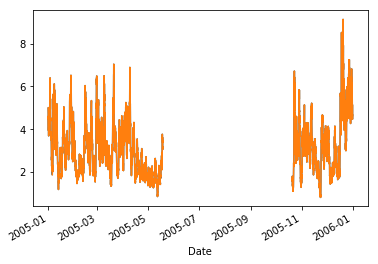

In [185]:
yr1995.plot()
yr1995_hr.plot()

In [187]:
yr1995.index

DatetimeIndex(['2005-01-01 00:00:00', '2005-01-01 01:00:00',
               '2005-01-01 02:00:00', '2005-01-01 03:00:00',
               '2005-01-01 04:00:00', '2005-01-01 05:00:00',
               '2005-01-01 06:00:00', '2005-01-01 07:00:00',
               '2005-01-01 08:00:00', '2005-01-01 09:00:00',
               ...
               '2005-12-31 14:00:00', '2005-12-31 15:00:00',
               '2005-12-31 16:00:00', '2005-12-31 17:00:00',
               '2005-12-31 18:00:00', '2005-12-31 19:00:00',
               '2005-12-31 20:00:00', '2005-12-31 21:00:00',
               '2005-12-31 22:00:00', '2005-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=5017, freq=None)

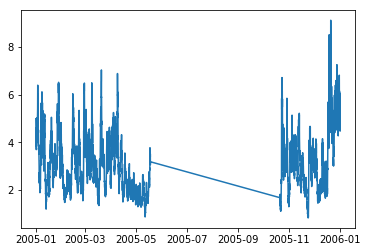

In [191]:
check = yr1995_hr.interpolate(method='time')
plt.plot(check)

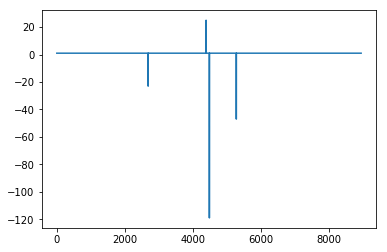

In [132]:
plt.plot(diff_hrs)

In [99]:
df_B.head()

,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,ID
Date,,,,,,,,,,,,,,,,,
1994-10-19 00:00:00,1994,10,19,0,12.0,3.3,4.5,3.1,14.3,9.8,NaN,1017.5,16.7,18.8,NaN,NaN,46059
1994-10-19 01:00:00,1994,10,19,1,337.0,1.6,2.9,2.7,12.5,9.3,NaN,1017.4,16.7,18.8,NaN,NaN,46059
1994-10-19 02:00:00,1994,10,19,2,340.0,3.5,4.9,3.0,14.3,10.0,NaN,1017.3,16.8,18.8,NaN,NaN,46059
1994-10-19 03:00:00,1994,10,19,3,343.0,4.3,6.2,3.0,14.3,10.2,NaN,1017.3,16.8,18.8,NaN,NaN,46059
1994-10-19 04:00:00,1994,10,19,4,331.0,4.1,6.8,2.9,12.5,9.4,NaN,1018.0,16.4,18.8,NaN,NaN,46059
